In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import os
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
fileName = 'C:/Users/akaba/Downloads/usa_00012.csv'
file = pd.read_csv(fileName)
dfCDI = pd.DataFrame(file)

C:\Users\akaba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfCDI.shape

(6787855, 40)

In [4]:
dfCDI.columns

Index(['YEAR', 'MULTYEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER',
       'CPI99', 'STATEFIP', 'COUNTYFIP', 'DENSITY', 'CITY', 'PUMA', 'STRATA',
       'GQ', 'OWNERSHP', 'OWNERSHPD', 'OWNCOST', 'RENTGRS', 'HHINCOME',
       'CIHISPEED', 'PERNUM', 'PERWT', 'FAMSIZE', 'SEX', 'AGE', 'RACE',
       'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'OCCSOC', 'INDNAICS',
       'INCTOT', 'FTOTINC', 'INCWAGE', 'MIGCOUNTY1', 'MOVEDIN', 'TRANTIME'],
      dtype='object')

In [5]:
dfCDI = dfCDI[dfCDI['AGE']>=21]
dfCDI.shape

(4823667, 40)

In [6]:
dfHomeOwn=dfCDI[dfCDI['OWNERSHP']==1]
dfHomeOwn.RENTGRS.describe()

count    2964818.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: RENTGRS, dtype: float64

In [7]:
dfCDI = dfCDI[dfCDI['OWNERSHP']!=0]
dfCDI.shape

(4677699, 40)

In [8]:
dfCDI['affrentdec'] = dfCDI['RENTGRS']*12/dfCDI['HHINCOME']

In [9]:
def housingFunc(own, affrentdec):
    if own==1:
        housingCat=2
    elif own==2 and affrentdec<.3:
        housingCat=1
    else:
        housingCat=0
    return housingCat

In [10]:
dfCDI['HousingCat'] = dfCDI.apply(lambda x: housingFunc(x['OWNERSHP'], x['affrentdec']), axis=1)
dfCDI['HousingCat'].value_counts()

2    2964818
1     968222
0     744659
Name: HousingCat, dtype: int64

In [11]:
dfCDI['EDUCbin'] = [1 if x >=8 else 0 for x in dfCDI['EDUC']]
dfCDI['EDUCbin'].value_counts()

0    2937721
1    1739978
Name: EDUCbin, dtype: int64

In [12]:
dfCDI['TRANTIME'].value_counts()

0      1988964
30      394673
15      393749
20      378805
10      319484
        ...   
119          3
118          3
123          3
117          3
126          1
Name: TRANTIME, Length: 133, dtype: int64

## Split by year

In [13]:
dfCDI['YEAR'].value_counts()

2019    1358004
2010    1219545
2000    1119919
1990     980231
Name: YEAR, dtype: int64

In [14]:
df19=dfCDI[dfCDI['YEAR']==2019]
df10=dfCDI[dfCDI['YEAR']==2010]
df00=dfCDI[dfCDI['YEAR']==2000]
df90=dfCDI[dfCDI['YEAR']==1990]

In [15]:
print(dfCDI.columns.get_loc("HousingCat"))
print(dfCDI.columns.get_loc("EDUCbin"))
print(dfCDI.columns.get_loc("TRANTIME"))
print(dfCDI.columns.get_loc("HHWT"))
print(dfCDI.columns.get_loc("HHINCOME"))
print(dfCDI.columns.get_loc("RACE"))
print(dfCDI.columns.get_loc("AGE"))
print(dfCDI.columns.get_loc("SEX"))
print(dfCDI.columns.get_loc("COUNTYFIP"))
print(dfCDI.columns.get_loc("HISPAN"))

41
42
39
5
19
26
25
24
9
28


In [16]:
x19 = df19.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x10 = df10.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x00 = df00.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x90 = df90.iloc[:, [41,42,39,5,19,26,25,24,9,28]]

## Scaling Values

In [17]:

scaler = StandardScaler()
scalerNum = scaler.fit(x19)
scalerNum1 = scaler.fit(x10)
scalerNum2 = scaler.fit(x00)
scalerNum3 = scaler.fit(x90)
xstd19 = scalerNum.transform(x19)
xstd10 = scalerNum1.transform(x10)
xstd00 = scalerNum2.transform(x00)
xstd90 = scalerNum3.transform(x90)

In [18]:
dfX19 = pd.DataFrame(xstd19, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX10 = pd.DataFrame(xstd10, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX00 = pd.DataFrame(xstd00, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX90 = pd.DataFrame(xstd90, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])

## Sillouette Score 

In [19]:
#2019
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX19.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX19.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.4035909835020299
For n_clusters = 3 the average silhouette_score is: 0.4442452132686769
For n_clusters = 4 the average silhouette_score is: 0.49978291232487454
For n_clusters = 5 the average silhouette_score is: 0.5323499116354198
For n_clusters = 6 the average silhouette_score is: 0.5457660568403607
For n_clusters = 7 the average silhouette_score is: 0.5711858544158551


In [20]:
#2010 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX10.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX10.iloc[:,0:3], cluster_labels, metric='euclidean', sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.43147861154689143
For n_clusters = 3 the average silhouette_score is: 0.48873568058840666
For n_clusters = 4 the average silhouette_score is: 0.5323050196476307
For n_clusters = 5 the average silhouette_score is: 0.568057876881537
For n_clusters = 6 the average silhouette_score is: 0.553087563969649
For n_clusters = 7 the average silhouette_score is: 0.5846700441152457


In [21]:
#2000 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX00.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX00.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.434658356659892
For n_clusters = 3 the average silhouette_score is: 0.46018108120040924
For n_clusters = 4 the average silhouette_score is: 0.5105896063831049
For n_clusters = 5 the average silhouette_score is: 0.511154994009078
For n_clusters = 6 the average silhouette_score is: 0.5509203580770522
For n_clusters = 7 the average silhouette_score is: 0.5602816340696165


In [22]:
#1990 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX90.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX90.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.43444534187149714
For n_clusters = 3 the average silhouette_score is: 0.48376961216998
For n_clusters = 4 the average silhouette_score is: 0.5204556720415574
For n_clusters = 5 the average silhouette_score is: 0.5463016915908083
For n_clusters = 6 the average silhouette_score is: 0.5581242253336549
For n_clusters = 7 the average silhouette_score is: 0.5798639063981739


## Clustering

In [23]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX19.iloc[:,0:3])
X19fin = scaler.inverse_transform(dfX19)
dfX19fin = pd.DataFrame(X19fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX19fin['labels'] = kmeans.labels_
cluster_sum19 = dfX19fin.groupby(by = 'labels').mean()
cluster_sum19.head(4)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,1.799385,1.000000,12.916467,17.956563,173946.110232,2.457863,50.998305,1.532594,54.820877,0.235385
1,0.000000,0.287396,10.451930,23.018457,38730.930909,2.967576,45.252069,1.561326,52.060037,0.650695
2,1.524420,0.469698,69.495130,19.508688,148009.041538,2.909480,43.849215,1.400276,50.465479,0.560591
3,1.757582,0.000000,9.116488,19.048280,104816.696227,2.703187,52.624218,1.528055,53.225065,0.584194


In [24]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX10.iloc[:,0:3])
X10fin = scaler.inverse_transform(dfX10)
dfX10fin = pd.DataFrame(X10fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX10fin['labels'] = kmeans.labels_
cluster_sum10 = dfX10fin.groupby(by = 'labels').mean()
cluster_sum10.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,8.311891,18.186226,86534.360075,2.448684,53.102443,1.548827,53.831618,0.470251
1,1.816378,1.000000,11.849024,18.170878,136511.353001,2.262138,49.380391,1.524656,55.140022,0.193769
2,0.391211,0.145278,10.025884,22.861778,46992.433084,2.895852,43.351310,1.539566,52.248687,0.628307
3,1.616042,0.485011,64.852713,20.161208,116646.961642,2.698102,43.321468,1.388535,51.684387,0.478809


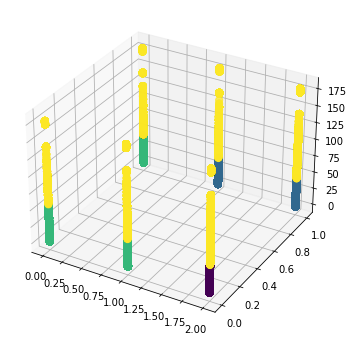

In [149]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(26,6))
ax = fig.add_subplot(131,projection='3d')
ax.scatter(dfX10fin.HousingCat,dfX10fin.EDUCbin,dfX10fin.TRANTIME,c=dfX10fin.labels,s=50)

<AxesSubplot:>

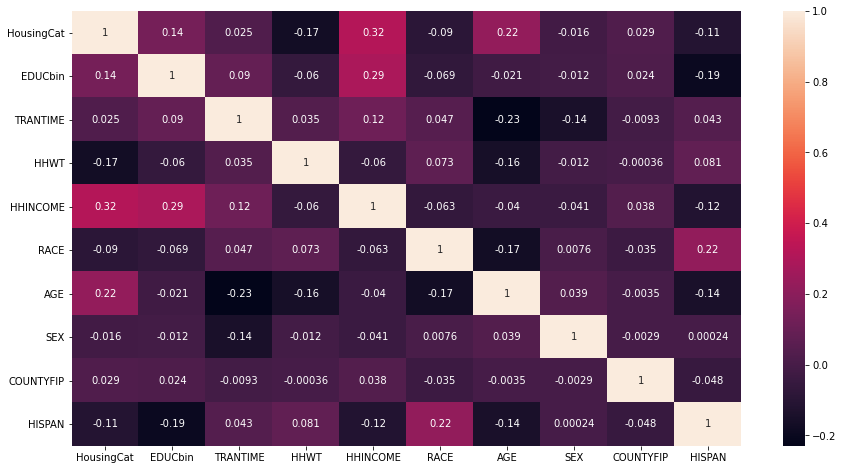

In [25]:
Xcorr10=dfX10fin.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr10.corr(), annot = True)


In [26]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX00.iloc[:,0:3])
X00fin = scaler.inverse_transform(dfX00)
dfX00fin = pd.DataFrame(X00fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX00fin['labels'] = kmeans.labels_
cluster_sum00 = dfX00fin.groupby(by = 'labels').mean()
cluster_sum00.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,9.552195,19.452120,72501.662914,2.645157,50.562585,1.548115,52.861837,0.461594
1,1.766062,1.000000,15.008891,20.049809,110868.113690,2.202240,46.303897,1.501485,54.308015,0.171414
2,0.532048,0.095235,10.468938,20.373155,49265.692795,3.343399,40.657700,1.525789,51.699441,0.696424
3,1.549440,0.375000,80.903810,20.257028,89374.402053,2.733913,40.906761,1.370745,50.977984,0.471149


<AxesSubplot:>

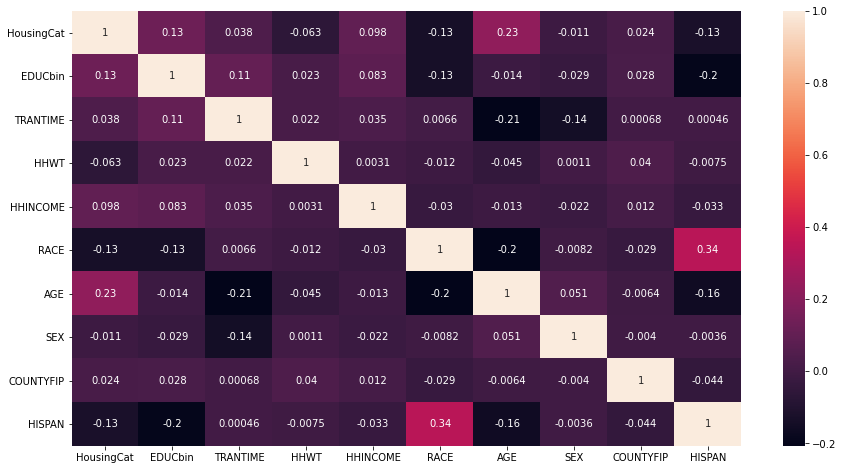

In [27]:
Xcorr00=dfX00fin.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr00.corr(), annot = True)


In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX90.iloc[:,0:3])
X90fin = scaler.inverse_transform(dfX90)
dfX90fin = pd.DataFrame(X90fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX90fin['labels'] = kmeans.labels_
cluster_sum90 = dfX90fin.groupby(by = 'labels').mean()
cluster_sum90.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,8.200154,19.382852,50344.338479,1.968691,50.362844,1.569326,52.958754,0.295185
1,1.770943,1.000000,15.426928,19.976285,71433.732782,1.765125,43.500383,1.478019,53.937945,0.146629
2,0.500794,0.093987,10.423392,21.640624,29715.600988,2.640184,39.138719,1.533481,52.118339,0.538956
3,1.602153,0.271089,59.800477,20.401737,59819.405186,2.189663,39.122303,1.352164,51.615530,0.392465


<AxesSubplot:>

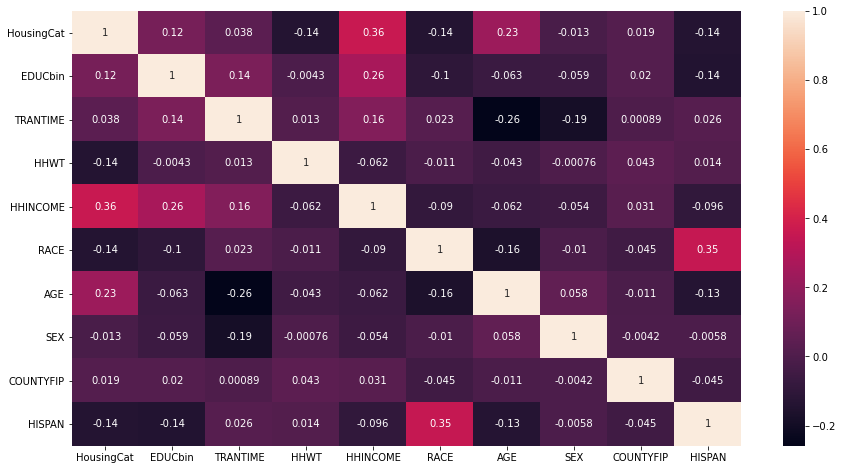

In [29]:
Xcorr90=dfX90fin.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr90.corr(), annot = True)


## Geographic Grouping

In [32]:
dfX10fin.head(5)

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN,labels
0,2.0,0.0,1.776357e-15,18.0,49430.0,1.0,67.0,1.0,85.0,1.0,0
1,2.0,0.0,1.776357e-15,18.0,49430.0,1.0,64.0,2.0,85.0,1.0,0
2,0.0,0.0,8.000000e+00,4.0,25829.0,1.0,37.0,2.0,37.0,1.0,2
3,0.0,0.0,1.776357e-15,4.0,25829.0,1.0,36.0,1.0,37.0,0.0,2
4,2.0,1.0,1.776357e-15,12.0,232009.0,1.0,49.0,2.0,73.0,0.0,1


In [100]:
clust2019_0 = dfX19fin[dfX19fin['labels']==0]
clust2019_1 = dfX19fin[dfX19fin['labels']==1]
clust2019_2 = dfX19fin[dfX19fin['labels']==2]
clust2019_3 = dfX19fin[dfX19fin['labels']==3]

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN,labels
0,1.0,1.0,1.000000e+01,20.0,56113.0,1.0,41.0,1.0,59.0,1.0,0
2,2.0,1.0,1.776357e-15,15.0,250353.0,1.0,34.0,2.0,81.0,0.0,0
3,2.0,1.0,2.500000e+01,15.0,250353.0,1.0,34.0,1.0,81.0,0.0,0
4,2.0,1.0,1.776357e-15,14.0,117407.0,1.0,55.0,2.0,37.0,0.0,0
5,2.0,1.0,2.100000e+01,14.0,117407.0,1.0,25.0,2.0,37.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1357988,2.0,1.0,1.776357e-15,72.0,133000.0,1.0,46.0,1.0,97.0,0.0,0
1357990,2.0,1.0,1.776357e-15,12.0,60000.0,9.0,68.0,2.0,37.0,0.0,0
1357996,1.0,1.0,3.000000e+01,13.0,59000.0,6.0,24.0,1.0,85.0,0.0,0
1358002,2.0,1.0,1.000000e+01,14.0,158000.0,8.0,25.0,2.0,107.0,0.0,0


In [77]:
def GEOIDfunc(geoid):
    if len(geoid)==1:
        geoid='0600'+geoid
    elif len(geoid)==2:
        geoid='060'+geoid
    elif len(geoid)==3:
        geoid='06'+geoid
    else:
        pass
    return geoid

In [78]:
COUNTYcsv = 'C:/Users/akaba/Downloads/CA_counties.csv'
counties = pd.read_csv(COUNTYcsv)
countiesdf = pd.DataFrame(counties)
countiesdf['FIPS']= countiesdf['FIPS'].astype(str)
countiesdf['FIPS']='0'+countiesdf['FIPS']

In [117]:
def geo(df,year,cluster):
    df = df[['COUNTYFIP','EDUCbin','HHWT','labels']].groupby(['labels','COUNTYFIP']).agg({'EDUCbin' : ['count'], 'HHWT' : ['sum']}).copy()
    df = (df['HHWT']/df['HHWT'].sum())*df['EDUCbin'].values
    df.columns = ['Weighted_pop']
    df.reset_index(inplace=True)
    df['COUNTYFIP'] = pd.Series(df['COUNTYFIP'], dtype="int")
    df['COUNTYFIP'] = pd.Series(df['COUNTYFIP'], dtype="string")
    df['Weighted_pop'] = pd.Series(df['Weighted_pop'], dtype="int")
    df['GEOID'] = df.apply(lambda x: GEOIDfunc(x['COUNTYFIP']), axis=1)
    df = df.merge(countiesdf,how='inner',left_on='GEOID',right_on='FIPS')
    df = df[['labels','GEOID','COUNTY','Weighted_pop']]
    df.to_csv('C:/Users/akaba/Downloads/'+str(year)+'_'+str(cluster)+'.csv')

In [118]:
geo(dfX10fin,2019,1)

In [120]:
pd.read_csv('C:/Users/akaba/Downloads/2019_1.csv')

,Unnamed: 0,labels,GEOID,COUNTY,Weighted_pop
0,0,0,6001,Alameda,149
1,1,1,6001,Alameda,274
2,2,2,6001,Alameda,133
3,3,3,6001,Alameda,31
4,4,0,6007,Butte,8
...,...,...,...,...,...
131,131,3,6111,Ventura,5
132,132,0,6113,Yolo,2
133,133,1,6113,Yolo,4
134,134,2,6113,Yolo,3


In [126]:
df10geo = dfX10fin[['COUNTYFIP','EDUCbin','HHWT','labels']].groupby(['labels','COUNTYFIP']).agg({'EDUCbin' : ['count'], 'HHWT' : ['sum']}).copy()


KeyError: "['labels' 'COUNTYFIP'] not in index"

In [127]:
df10geo = (df10geo['HHWT']/df10geo['HHWT'].sum())*df10geo['EDUCbin'].values

In [128]:
df10geo.columns = ['Weighted_pop']

In [129]:
df10geo.reset_index(inplace=True)

In [130]:

df10geo['COUNTYFIP'] = pd.Series(df10geo['COUNTYFIP'], dtype="int")
df10geo['COUNTYFIP'] = pd.Series(df10geo['COUNTYFIP'], dtype="string")
df10geo['Weighted_pop'] = pd.Series(df10geo['Weighted_pop'], dtype="int")


In [131]:
df10geo.dtypes

labels           int64
COUNTYFIP       string
Weighted_pop     int32
dtype: object

In [132]:
def GEOIDfunc(geoid):
    if len(geoid)==1:
        geoid='0600'+geoid
    elif len(geoid)==2:
        geoid='060'+geoid
    elif len(geoid)==3:
        geoid='06'+geoid
    else:
        pass
    return geoid

In [133]:
df10geo['GEOID'] = df10geo.apply(lambda x: GEOIDfunc(x['COUNTYFIP']), axis=1)

In [134]:
COUNTYcsv = 'C:/Users/akaba/Downloads/CA_counties.csv'
counties = pd.read_csv(COUNTYcsv)
countiesdf = pd.DataFrame(counties)
countiesdf['FIPS']= countiesdf['FIPS'].astype(str)
countiesdf['FIPS']='0'+countiesdf['FIPS']

In [135]:
df10geomerged = df10geo.merge(countiesdf,how='inner',left_on='GEOID',right_on='FIPS')
df10geomerged = df10geomerged[['GEOID','labels','COUNTY','Weighted_pop']]
df10geomerged

,GEOID,labels,COUNTY,Weighted_pop
0,06001,0,Alameda,149
1,06001,1,Alameda,274
2,06001,2,Alameda,133
3,06001,3,Alameda,31
4,06007,0,Butte,8
...,...,...,...,...
131,06111,3,Ventura,5
132,06113,0,Yolo,2
133,06113,1,Yolo,4
134,06113,2,Yolo,3


In [150]:
df10geomerged.to_csv('C:/Users/akaba/Downloads/df10geo.csv')